In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Load the Telco Churn dataset from the UCI Machine Learning Repository
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn (3).csv")
df.sample(10)

#droping the extra column
df.drop('customerID',axis='columns',inplace=True)

#finding the type of the data(object or float or integer etc.)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [3]:
#values of a certain attribute
df.TotalCharges.values

# converting an attribute to numeric value and ignoring the errors comming due to spaces
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

#shape of the missing data and the data set
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape
df.shape

#dropping the rows of the missing variables and forming a new data set
df1 = df[df.TotalCharges!=' ']
df1.shape
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
#forming the new data frame
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.dtypes
df1.sample(5)
df1.dtypes
#categorical data identification
def print_unique_col_values(df):    
    for col in df:
        if df[col].dtype=='object':
            print(f'{col}:{df[col].unique()}')
#replacing same variables in same name
print_unique_col_values(df1)
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)
print_unique_col_values(df1)

C:\Users\SURJAKANTA\AppData\Local\Temp\ipykernel_21612\364624969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)
C:\Users\SURJAKANTA\AppData\Local\Temp\ipykernel_21612\364624969.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\SURJAKANTA\AppData\Local\Temp\ipykernel_21612\364624969.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']
gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank tra

In [7]:
#nominal data transformation
binary_col=['Partner', 'Dependents', 'PhoneService', 'MultipleLines','OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
            'StreamingMovies','PaperlessBilling', 'Churn']
for col in binary_col:
    df1[col].replace({'Yes': 1,'No': 0}, inplace = True)
#df1.replace({'Yes': 1,'No': 0}, inplace = True)
print_unique_col_values(df1)
for col in df1:
    print(f'{col}:{df1[col].unique()}')
    
#df1['gender'].replace({'Female': 1,'Male': 0}, inplace = True)
#for col in df1:
   # print(f'{col}:{df1[col].unique()}')
    
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod','gender'])
df2.columns    
df2.sample(4)
df2.dtypes

C:\Users\SURJAKANTA\AppData\Local\Temp\ipykernel_21612\2758716815.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0}, inplace = True)


gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.1

SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
Contract_Month-to-month        

In [8]:
# scaling
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2.sample(3)
for col in df2:
    print(f'{col}:{df2[col].unique()}')

SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
S

In [9]:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

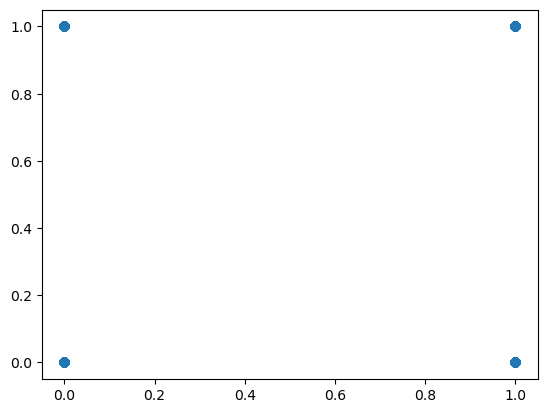

[0.02124072 0.02326025 0.01993484 0.15474513 0.00660061 0.0196847
 0.02230174 0.02119761 0.01872156 0.02007945 0.01741577 0.01846775
 0.0258108  0.16624202 0.1791523  0.01151322 0.03756924 0.01449358
 0.06609603 0.0114644  0.02316765 0.01140767 0.01178991 0.03161448
 0.01153826 0.01639969 0.01809062]
Feature ranking:
Feature ranking:
1. feature 14 (0.179152)
2. feature 13 (0.166242)
3. feature 3 (0.154745)
4. feature 18 (0.066096)
5. feature 16 (0.037569)
6. feature 23 (0.031614)
7. feature 12 (0.025811)
8. feature 1 (0.023260)
9. feature 20 (0.023168)
10. feature 6 (0.022302)
11. feature 0 (0.021241)
12. feature 7 (0.021198)
13. feature 9 (0.020079)
14. feature 2 (0.019935)
15. feature 5 (0.019685)
16. feature 8 (0.018722)
17. feature 11 (0.018468)
18. feature 26 (0.018091)
19. feature 10 (0.017416)
20. feature 25 (0.016400)
21. feature 17 (0.014494)
22. feature 22 (0.011790)
23. feature 24 (0.011538)
24. feature 15 (0.011513)
25. feature 19 (0.011464)
26. feature 21 (0.011408)
27. fe

Text(95.72222222222221, 0.5, 'Truth')

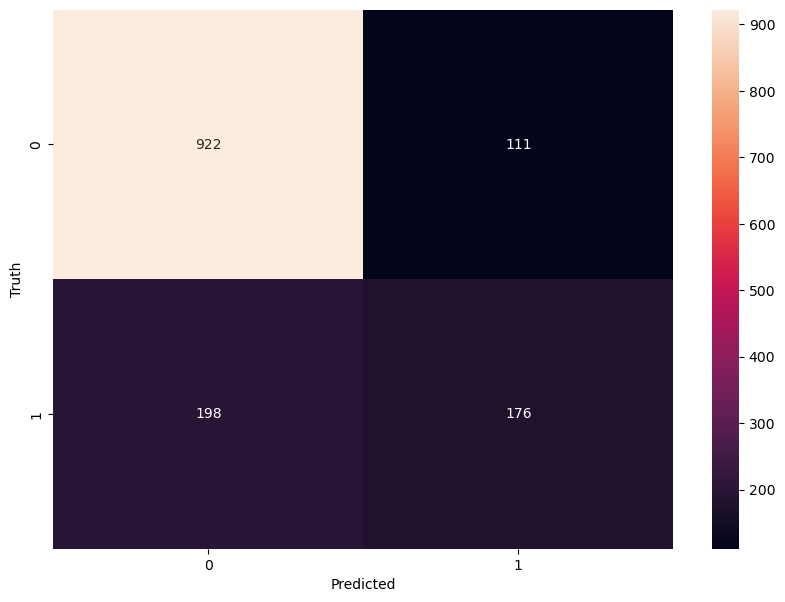

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
Rf= RandomForestClassifier(criterion='gini')
Rf= Rf.fit(x_train,y_train)
y_pred_rf=Rf.predict(x_test)
plt.scatter(y_test,y_pred_rf)
plt.show()




In [11]:
print(Rf.feature_importances_)
print("Feature ranking:")
importances = Rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

format(Rf.score(x_train,y_train))
format(Rf.score(x_test,y_test))

scores = cross_val_score(Rf,x_train,y_train,cv=5)
print(scores)
print(scores.mean())

[0.02124072 0.02326025 0.01993484 0.15474513 0.00660061 0.0196847
 0.02230174 0.02119761 0.01872156 0.02007945 0.01741577 0.01846775
 0.0258108  0.16624202 0.1791523  0.01151322 0.03756924 0.01449358
 0.06609603 0.0114644  0.02316765 0.01140767 0.01178991 0.03161448
 0.01153826 0.01639969 0.01809062]
Feature ranking:
Feature ranking:
1. feature 14 (0.179152)
2. feature 13 (0.166242)
3. feature 3 (0.154745)
4. feature 18 (0.066096)
5. feature 16 (0.037569)
6. feature 23 (0.031614)
7. feature 12 (0.025811)
8. feature 1 (0.023260)
9. feature 20 (0.023168)
10. feature 6 (0.022302)
11. feature 0 (0.021241)
12. feature 7 (0.021198)
13. feature 9 (0.020079)
14. feature 2 (0.019935)
15. feature 5 (0.019685)
16. feature 8 (0.018722)
17. feature 11 (0.018468)
18. feature 26 (0.018091)
19. feature 10 (0.017416)
20. feature 25 (0.016400)
21. feature 17 (0.014494)
22. feature 22 (0.011790)
23. feature 24 (0.011538)
24. feature 15 (0.011513)
25. feature 19 (0.011464)
26. feature 21 (0.011408)
27. fe

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.61      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

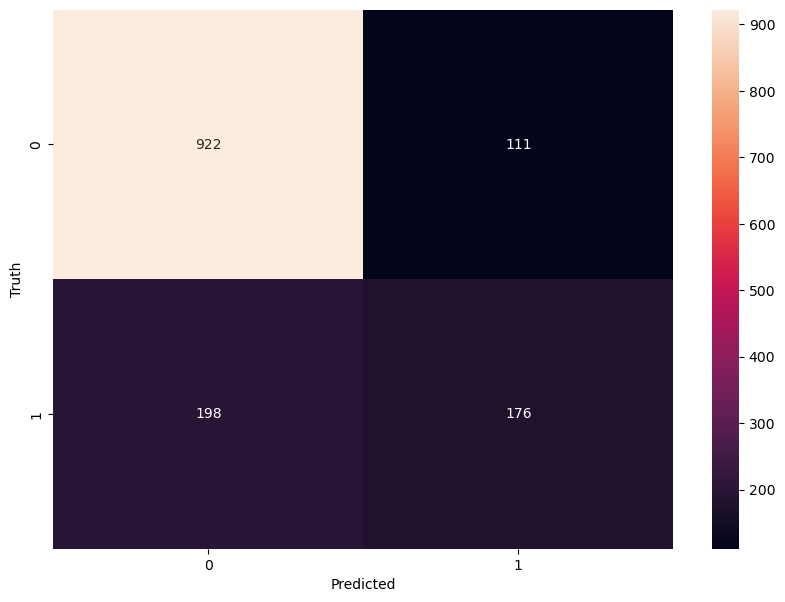

In [12]:
from sklearn.metrics import confusion_matrix , classification_report
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, y_pred_rf))
import tensorflow as tf
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_rf)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Hyperparametric tuning imbalanced data

In [13]:
"""#### Hyperparametric tuning #####"""
rf = RandomForestClassifier()
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=10)] #no. of trees 
max_features=["auto","sqrt"] #no. of features considered in every split
max_depth=[int(x) for x in np.linspace(start=50,stop=100,num=20)] #no. of leaves in the trees
min_samples_split=[2,5,10,20,50] #min no. of samples required to split a node
min_samples_leaf=[1,2,5,10] #min no. of samples required at each leaf node
#bootstrap=['True']
grid_para={'n_estimators':n_estimators,
         'max_features':max_features, 
         'max_depth':max_depth,
         'min_samples_split':min_samples_split,
         'min_samples_leaf':min_samples_leaf}
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(estimator=rf,param_distributions=grid_para,n_iter=100,cv=5,verbose=2,random_state=42,n_jobs=1)
#grid_search= GridSearchCV(rf, param_grid=grid_para,n_jobs=-1,cv=5,verbose=3)
random_search.fit(x_train,y_train)
y_pred_rfhp=random_search.predict(x_test)
format(random_search.score(x_train,y_train))
format(random_search.score(x_test,y_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  34.5s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  32.9s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  32.7s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  33.1s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  32.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=344; total time=  12.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=344; total time=  12.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=344; total time=  12.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=344; total time=  10.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=344; total time=   9.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=  10.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=  11.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=   9.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=  10.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=  11.4s
[CV] END max_depth=68, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=955; total time=  24.7s
[CV] END max_depth=68, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=955; total time=  25.2s
[CV] END max_depth=68, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=955; total time=  27.7s
[CV] END max_depth=68, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=955; total time=  27.9s
[CV] END max_depth=68, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=955; total time=  29.7s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=466; total time=  11.8s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=466; total time=  11.0s
[CV] END max_depth=76, max_featur

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  15.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  16.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  17.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  17.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  16.4s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=466; total time=  11.4s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=466; total time=  11.5s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=466; total time=  13.1s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=466; total time=  12.9s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=466; total time=  12.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=588; total time=  17.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=588; total time=  16.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=588; total time=  16.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=588; total time=  17.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=588; total time=  21.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=73, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   6.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=73, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   7.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=73, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   6.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=73, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   6.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=73, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   7.6s
[CV] END max_depth=57, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=711; total time=  21.4s
[CV] END max_depth=57, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=711; total time=  26.1s
[CV] END max_depth=57, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=711; total time=  30.6s
[CV] END max_depth=57, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=711; total time=  22.9s
[CV] END max_depth=57, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=711; total time=  21.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=588; total time=  15.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=588; total time=  15.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=588; total time=  14.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=588; total time=  17.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=588; total time=  20.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=955; total time=  37.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=955; total time=  28.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=955; total time=  26.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=955; total time=  28.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=955; total time=  27.6s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=222; total time=   5.7s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=222; total time=   5.9s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=222; total time=   5.3s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=222; total time=   5.4s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=222; total time=   5.2s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=344; total time=   8.2s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=344; total time=   7.7s
[CV] END max_depth=76, max_feat

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=588; total time=  19.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=588; total time=  18.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=588; total time=  21.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=588; total time=  18.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=588; total time=  18.2s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=222; total time=   5.4s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=222; total time=   5.2s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=222; total time=   5.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=222; total time=   5.2s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=222; total time=   5.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=955; total time=  21.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=955; total time=  19.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=955; total time=  20.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=955; total time=  23.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=955; total time=  22.4s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1077; total time=  25.9s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1077; total time=  25.2s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1077; total time=  25.1s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1077; total time=  23.0s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1077; total time=  22.4s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=344; total time=   9.1s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=344; total time=   9.6s
[CV] END max_depth=63, max_f

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=89, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   8.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=89, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   6.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=89, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   8.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=89, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   7.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=89, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   8.7s
[CV] END max_depth=97, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=833; total time=  28.3s
[CV] END max_depth=97, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=833; total time=  31.4s
[CV] END max_depth=97, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=833; total time=  25.2s
[CV] END max_depth=97, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=833; total time=  20.8s
[CV] END max_depth=97, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=833; total time=  22.0s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=588; total time=  12.4s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=588; total time=  15.0s
[CV] END max_depth=52, ma

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=222; total time=   8.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=222; total time=   7.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=222; total time=   7.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=222; total time=   6.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=222; total time=   7.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  46.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  39.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  42.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  41.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  36.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   5.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   5.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   5.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   6.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   6.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1077; total time=  39.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1077; total time=  43.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1077; total time=  43.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1077; total time=  50.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1077; total time=  40.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=833; total time=  22.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=833; total time=  32.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=833; total time=  44.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=833; total time=  37.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=833; total time=  37.8s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=  13.0s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=  11.7s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=  12.4s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=  11.5s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=  10.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  35.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  37.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  35.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  34.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  31.3s
[CV] END max_depth=78, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=588; total time=  14.3s
[CV] END max_depth=78, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=588; total time=  13.7s
[CV] END max_depth=78, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=588; total time=  13.6s
[CV] END max_depth=78, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=588; total time=  13.7s
[CV] END max_depth=78, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=588; total time=  11.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=955; total time=  23.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=955; total time=  26.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=955; total time=  28.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=955; total time=  27.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=955; total time=  28.7s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=955; total time=  34.6s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=955; total time=  35.8s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=955; total time=  36.4s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=955; total time=  38.8s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=955; total time=  39.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  26.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  22.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  20.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  20.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  19.9s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=833; total time=  19.1s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=833; total time=  22.0s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=833; total time=  22.1s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=833; total time=  22.1s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=833; total time=  23.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=  13.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=  15.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=  16.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=  17.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=  17.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  48.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  49.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  48.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  48.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  49.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=344; total time=  12.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=344; total time=  12.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=344; total time=  12.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=344; total time=  12.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=344; total time=  12.2s
[CV] END max_depth=81, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  25.4s
[CV] END max_depth=81, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  25.5s
[CV] END max_depth=81, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  22.5s
[CV] END max_depth=81, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  19.3s
[CV] END max_depth=81, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  18.0s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=711; total time=  19.3s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=711; total time=  19.6s
[CV] END max_depth=55, max_featu

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=222; total time=   5.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=222; total time=   5.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=222; total time=   5.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=222; total time=   5.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=222; total time=   5.3s
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1077; total time=  30.0s
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1077; total time=  27.1s
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1077; total time=  27.5s
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1077; total time=  35.2s
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1077; total time=  34.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=222; total time=   7.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=222; total time=   7.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=222; total time=   6.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=222; total time=   7.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=222; total time=   7.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  42.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  43.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  45.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  47.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  44.2s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   5.4s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   5.1s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   5.5s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   5.5s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   6.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=1200; total time=  26.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=1200; total time=  28.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=1200; total time=  33.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=1200; total time=  30.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=1200; total time=  27.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=344; total time=   9.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=344; total time=   9.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=344; total time=   9.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=344; total time=   9.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=344; total time=   9.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   5.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   5.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   4.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   4.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   4.9s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=   9.0s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=   9.3s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=  10.3s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=  11.3s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=  12.9s
[CV] END max_depth=92, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=588; total time=  23.2s
[CV] END max_depth=92, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=588; total time=  25.9s
[CV] END max_depth=92, max_features=sq

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=588; total time=  14.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=588; total time=  15.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=588; total time=  14.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=588; total time=  13.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=588; total time=  13.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=  28.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=  30.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=  28.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=  29.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=  26.7s
[CV] END max_depth=84, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=222; total time=   4.9s
[CV] END max_depth=84, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=222; total time=   4.9s
[CV] END max_depth=84, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=222; total time=   4.9s
[CV] END max_depth=84, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=222; total time=   4.6s
[CV] END max_depth=84, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=222; total time=   4.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  18.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  20.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  21.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  21.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  22.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  21.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  21.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  19.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  18.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  19.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=   8.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=   9.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=  10.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=  10.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=  10.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   7.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   6.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   6.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   6.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   6.7s
[CV] END max_depth=94, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=   8.9s
[CV] END max_depth=94, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=   8.2s
[CV] END max_depth=94, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=   8.6s
[CV] END max_depth=94, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=   9.0s
[CV] END max_depth=94, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=  11.1s
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=100; total time=   3.2s
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=100; total time=   3.1s
[CV] END max_depth=89, max_featu

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=  10.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=  13.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=  14.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=  14.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=  14.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=466; total time=  18.5s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=466; total time=  16.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=466; total time=  17.3s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=466; total time=  20.6s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=466; total time=  16.8s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=833; total time=  30.7s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=833; total time=  28.0s
[CV] END max_depth=73, max_features=sqrt

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=588; total time=  18.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=588; total time=  38.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=588; total time=  22.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=588; total time=  25.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=588; total time=  24.7s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1200; total time=  44.8s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1200; total time=  53.9s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1200; total time=  52.9s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1200; total time=  54.0s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1200; total time= 1.0min
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=222; total time=  13.1s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=222; total time=  13.0s
[CV] END max_depth=60, m

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=1200; total time=  39.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=1200; total time=  40.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=1200; total time=  48.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=1200; total time=  47.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=1200; total time=  47.1s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  51.8s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  57.8s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time= 1.0min
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time= 1.1min
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  57.0s
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1200; total time= 1.0min
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1200; total time=  58.3s
[CV] END max_depth=89, max

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=50, n_estimators=100; total time=   5.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=50, n_estimators=100; total time=   4.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=50, n_estimators=100; total time=   5.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=50, n_estimators=100; total time=   4.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=50, n_estimators=100; total time=   4.8s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=  18.7s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=  16.3s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=  17.3s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=344; total time=  22.1s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=344; total time=  22.0s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=344; total time=  22.2s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=344; total time=  23.9s
[CV] END max_depth=55, max_features=

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=466; total time=  16.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=466; total time=  16.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=466; total time=  16.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=466; total time=  15.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=466; total time=  15.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=466; total time=  16.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=466; total time=  17.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=466; total time=  17.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=466; total time=  17.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=466; total time=  17.1s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=466; total time=  20.2s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=466; total time=  20.0s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=466; total time=  19.5s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=466; total time=  19.8s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=466; total time=  20.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=588; total time=  25.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=588; total time=  25.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=588; total time=  25.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=588; total time=  25.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=588; total time=  25.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  39.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  39.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  39.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  39.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  40.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1077; total time=  36.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1077; total time=  37.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1077; total time=  37.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1077; total time=  36.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1077; total time=  36.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=711; total time=  22.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=711; total time=  22.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=711; total time=  23.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=711; total time=  22.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=711; total time=  22.5s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=833; total time=  26.5s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=833; total time=  26.3s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=833; total time=  42.7s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=833; total time=  20.0s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=833; total time=  18.4s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  37.6s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  35.1s
[CV] END max_depth=55, max_featu

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=92, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=711; total time=  13.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=92, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=711; total time=  13.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=92, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=711; total time=  13.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=92, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=711; total time=  13.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=92, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=711; total time=  13.9s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   2.1s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   1.9s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   2.1s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   2.1s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   2.1s


'0.8024164889836531'

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.67      0.50      0.57       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



Text(95.72222222222221, 0.5, 'Truth')

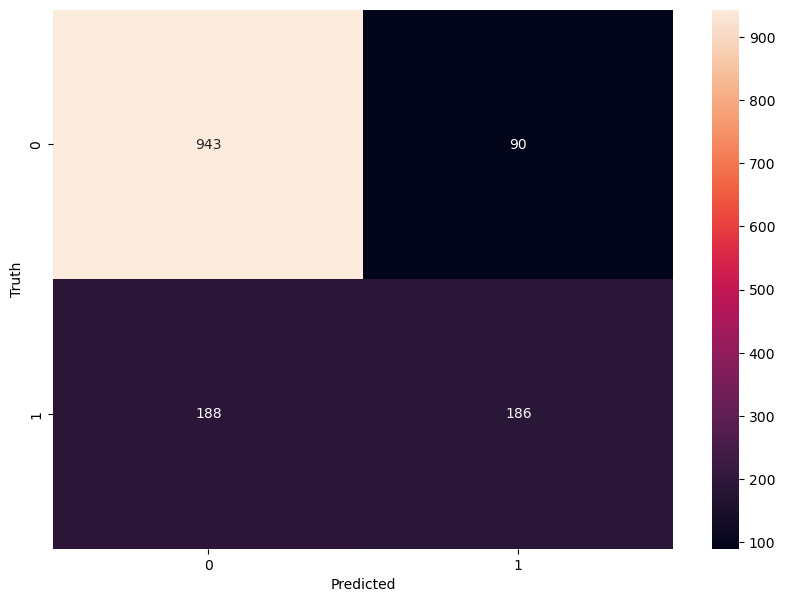

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, y_pred_rfhp))
import tensorflow as tf
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_rfhp)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

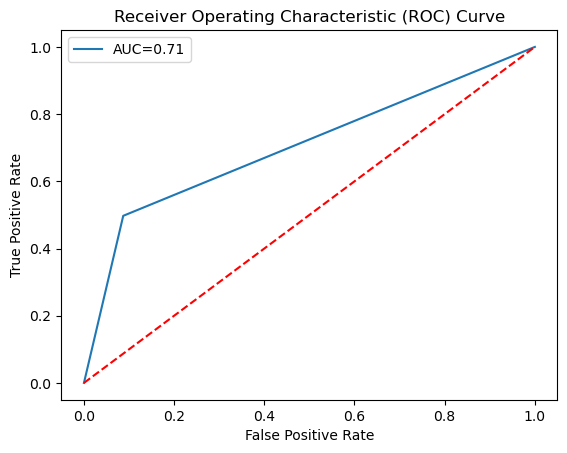

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# true binary labels and predicted probabilities from a classifier


# calculate fpr, tpr, and thresholds for different probability cutoffs
fp, tp, thresholds = roc_curve(y_test, y_pred_rfhp)

# calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_rfhp)

# plot the ROC curve
plt.plot(fp, tp, label=f'AUC={auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix , classification_report
# compute the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rfhp).ravel()

# compute the observed proportion of agreement
po = (tp + tn) / (tp + tn + fp + fn)

# compute the expected proportion of agreement
pe = ((tp + fp) * (tp + fn) + (tn + fp) * (tn + fn)) / (tp + tn + fp + fn) ** 2

# compute Cohen's kappa
kappa = (po - pe) / (1 - pe)

print(f"Cohen's kappa: {kappa}")

Cohen's kappa: 0.44761347941398266


# Hyperparametric tuning balancing using down sampling

In [17]:
"""#### Hyperparametric tuning #####"""
"""# DOWNsampling SMOTEENN"""
from imblearn.combine import SMOTEENN
sm= SMOTEENN()
x_resampled,y_resampled=sm.fit_resample(x,y)


# Split the dataset into training and testing sets
xd_train, xd_test, yd_train, yd_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)


rf = RandomForestClassifier()
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=10)] #no. of trees 
max_features=["auto","sqrt"] #no. of features considered in every split
max_depth=[int(x) for x in np.linspace(start=50,stop=100,num=20)] #no. of leaves in the trees
min_samples_split=[2,5,10,20,50] #min no. of samples required to split a node
min_samples_leaf=[1,2,5,10] #min no. of samples required at each leaf node
#bootstrap=['True']
grid_para={'n_estimators':n_estimators,
         'max_features':max_features, 
         'max_depth':max_depth,
         'min_samples_split':min_samples_split,
         'min_samples_leaf':min_samples_leaf}
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(estimator=rf,param_distributions=grid_para,n_iter=100,cv=5,verbose=2,random_state=42,n_jobs=1)
#grid_search= GridSearchCV(rf, param_grid=grid_para,n_jobs=-1,cv=5,verbose=3)
random_search.fit(xd_train,yd_train)
yd_pred_rfhp=random_search.predict(xd_test)
format(random_search.score(xd_train,yd_train))
format(random_search.score(xd_test,yd_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  18.4s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  17.7s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  17.5s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  17.5s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  18.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=344; total time=   7.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=344; total time=   7.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=344; total time=   7.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=344; total time=   7.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=344; total time=   7.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=   8.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=   7.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=   7.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=   7.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=   7.3s
[CV] END max_depth=68, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=955; total time=  20.7s
[CV] END max_depth=68, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=955; total time=  30.8s
[CV] END max_depth=68, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=955; total time=  31.1s
[CV] END max_depth=68, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=955; total time=  27.3s
[CV] END max_depth=68, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=955; total time=  25.3s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=466; total time=  12.7s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=466; total time=  13.1s
[CV] END max_depth=76, max_featur

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  15.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  13.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  14.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  14.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  18.8s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=466; total time=  13.4s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=466; total time=  12.1s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=466; total time=  10.8s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=466; total time=  10.5s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=466; total time=  12.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=588; total time=  16.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=588; total time=  16.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=588; total time=  19.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=588; total time=  16.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=588; total time=  14.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=73, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   4.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=73, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   4.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=73, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   4.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=73, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   5.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=73, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   4.8s
[CV] END max_depth=57, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=711; total time=  15.9s
[CV] END max_depth=57, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=711; total time=  14.8s
[CV] END max_depth=57, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=711; total time=  13.4s
[CV] END max_depth=57, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=711; total time=  14.9s
[CV] END max_depth=57, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=711; total time=  16.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=588; total time=  14.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=588; total time=  13.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=588; total time=  15.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=588; total time=  14.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=588; total time=  12.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=955; total time=  22.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=955; total time=  20.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=955; total time=  19.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=955; total time=  18.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=955; total time=  20.7s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=222; total time=   4.7s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=222; total time=   4.8s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=222; total time=   4.7s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=222; total time=   4.6s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=222; total time=   4.6s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=344; total time=   7.2s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=344; total time=   7.2s
[CV] END max_depth=76, max_feat

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=588; total time=  14.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=588; total time=  13.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=588; total time=  13.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=588; total time=  14.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=588; total time=  12.8s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=222; total time=   4.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=222; total time=   4.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=222; total time=   4.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=222; total time=   4.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=222; total time=   4.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=955; total time=  19.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=955; total time=  21.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=955; total time=  20.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=955; total time=  27.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=955; total time=  25.4s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1077; total time=  29.1s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1077; total time=  27.3s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1077; total time=  22.8s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1077; total time=  21.8s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1077; total time=  19.7s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=344; total time=   6.6s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=344; total time=   7.6s
[CV] END max_depth=63, max_f

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=89, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   5.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=89, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   4.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=89, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   4.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=89, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   4.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=89, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   5.0s
[CV] END max_depth=97, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=833; total time=  21.0s
[CV] END max_depth=97, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=833; total time=  23.1s
[CV] END max_depth=97, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=833; total time=  25.5s
[CV] END max_depth=97, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=833; total time=  27.5s
[CV] END max_depth=97, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=833; total time=  28.9s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=588; total time=  20.9s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=588; total time=  19.2s
[CV] END max_depth=52, ma

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=222; total time=   7.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=222; total time=   7.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=222; total time=   7.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=222; total time=   7.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=222; total time=   7.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  40.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  38.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  41.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  38.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  29.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   5.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   5.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   5.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   5.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   4.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1077; total time=  25.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1077; total time=  24.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1077; total time=  29.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1077; total time=  36.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1077; total time=  29.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=833; total time=  19.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=833; total time=  19.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=833; total time=  19.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=833; total time=  17.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=833; total time=  19.6s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=   6.9s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=   7.3s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=   7.7s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=   8.1s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=   8.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  27.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  26.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  26.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  25.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  23.5s
[CV] END max_depth=78, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=588; total time=  11.6s
[CV] END max_depth=78, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=588; total time=  12.1s
[CV] END max_depth=78, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=588; total time=  13.4s
[CV] END max_depth=78, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=588; total time=  14.0s
[CV] END max_depth=78, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=588; total time=  14.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=955; total time=  22.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=955; total time=  22.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=955; total time=  23.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=955; total time=  23.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=955; total time=  25.3s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=955; total time=  28.7s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=955; total time=  28.5s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=955; total time=  29.5s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=955; total time=  30.6s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=955; total time=  27.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  19.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  16.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  15.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  17.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  16.2s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=833; total time=  18.6s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=833; total time=  19.5s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=833; total time=  21.4s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=833; total time=  19.1s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=833; total time=  21.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=  11.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=  11.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=  11.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=  11.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=  11.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  26.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  33.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  42.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  30.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  32.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=344; total time=  12.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=344; total time=  12.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=344; total time=  14.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=344; total time=  11.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=344; total time=  10.2s
[CV] END max_depth=81, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  18.8s
[CV] END max_depth=81, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  15.2s
[CV] END max_depth=81, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  14.9s
[CV] END max_depth=81, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  17.1s
[CV] END max_depth=81, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  22.7s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=711; total time=  26.1s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=711; total time=  22.1s
[CV] END max_depth=55, max_featu

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=222; total time=   4.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=222; total time=   4.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=222; total time=   4.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=222; total time=   4.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=222; total time=   4.8s
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1077; total time=  25.0s
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1077; total time=  25.9s
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1077; total time=  25.0s
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1077; total time=  23.5s
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1077; total time=  22.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=222; total time=   5.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=222; total time=   5.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=222; total time=   5.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=222; total time=   5.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=222; total time=   5.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  30.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  32.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  34.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  32.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  31.9s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   5.0s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   4.9s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   4.9s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   4.9s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   5.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=1200; total time=  25.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=1200; total time=  25.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=1200; total time=  25.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=1200; total time=  25.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=1200; total time=  22.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=344; total time=   7.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=344; total time=   7.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=344; total time=   7.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=344; total time=   8.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=344; total time=   8.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   5.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   4.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   4.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   5.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   5.0s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=   8.3s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=   8.2s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=   8.3s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=   8.5s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=   8.4s
[CV] END max_depth=92, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=588; total time=  14.7s
[CV] END max_depth=92, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=588; total time=  14.2s
[CV] END max_depth=92, max_features=sq

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=588; total time=  11.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=588; total time=  11.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=588; total time=  11.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=588; total time=  12.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=588; total time=  12.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=  19.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=  19.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=  20.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=  20.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=  19.3s
[CV] END max_depth=84, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=222; total time=   4.5s
[CV] END max_depth=84, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=222; total time=   4.8s
[CV] END max_depth=84, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=222; total time=   4.6s
[CV] END max_depth=84, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=222; total time=   4.4s
[CV] END max_depth=84, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=222; total time=   4.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  17.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  19.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  20.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  18.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  19.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  17.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  17.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  16.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  16.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  15.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=   6.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=   6.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=   6.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=   6.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=   8.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   4.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   4.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   4.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   4.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   4.8s
[CV] END max_depth=94, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=   7.2s
[CV] END max_depth=94, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=   7.2s
[CV] END max_depth=94, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=   7.2s
[CV] END max_depth=94, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=   7.2s
[CV] END max_depth=94, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=   7.5s
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=100; total time=   2.0s
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=100; total time=   2.0s
[CV] END max_depth=89, max_featu

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=   8.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=   7.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=   7.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=   7.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=   7.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=466; total time=   9.5s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=466; total time=   9.5s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=466; total time=   9.8s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=466; total time=  11.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=466; total time=  12.2s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=833; total time=  23.1s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=833; total time=  23.7s
[CV] END max_depth=73, max_features=sqrt

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=588; total time=  11.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=588; total time=  11.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=588; total time=  11.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=588; total time=  11.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=588; total time=  12.9s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1200; total time=  26.2s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1200; total time=  26.0s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1200; total time=  25.8s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1200; total time=  26.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1200; total time=  23.3s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=222; total time=   4.5s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=222; total time=   4.4s
[CV] END max_depth=60, m

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=1200; total time=  21.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=1200; total time=  23.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=1200; total time=  24.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=1200; total time=  28.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=1200; total time=  36.4s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  40.9s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  39.2s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  39.0s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  40.1s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  40.8s
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1200; total time=  41.2s
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1200; total time=  40.3s
[CV] END max_depth=89, max

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=50, n_estimators=100; total time=   3.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=50, n_estimators=100; total time=   3.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=50, n_estimators=100; total time=   3.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=50, n_estimators=100; total time=   3.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=50, n_estimators=100; total time=   3.2s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=  11.3s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=  11.2s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=  10.6s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=  10.5s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=  10.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=100; total time=   3.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=100; total time=   2.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=100; total time=   3.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=100; total time=   2.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=100; total time=   2.9s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=344; total time=  11.3s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=344; total time=  11.1s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=344; total time=  11.3s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=344; total time=  11.4s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=344; total time=  12.0s
[CV] END max_depth=92, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=711; total time=  19.9s
[CV] END max_depth=92, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=711; total time=  13.7s
[CV] END max_depth=92, max_features=s

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=466; total time=   8.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=466; total time=   8.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=466; total time=   8.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=466; total time=   8.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=466; total time=   8.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=466; total time=   9.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=466; total time=   9.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=466; total time=   9.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=466; total time=   9.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=466; total time=   9.1s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=466; total time=   9.7s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=466; total time=   9.6s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=466; total time=   9.7s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=466; total time=   9.7s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=466; total time=   9.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=588; total time=  12.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=588; total time=  12.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=588; total time=  11.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=588; total time=  11.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=588; total time=  11.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  20.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  20.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  21.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  21.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  21.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1077; total time=  20.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1077; total time=  19.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1077; total time=  18.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1077; total time=  18.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1077; total time=  19.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=711; total time=  12.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=711; total time=  13.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=711; total time=  14.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=711; total time=  14.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=711; total time=  14.9s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=833; total time=  16.3s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=833; total time=  16.5s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=833; total time=  15.9s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=833; total time=  14.6s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=833; total time=  14.4s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  24.2s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  24.9s
[CV] END max_depth=55, max_featu

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=92, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=711; total time=  12.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=92, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=711; total time=  12.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=92, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=711; total time=  12.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=92, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=711; total time=  13.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=92, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=711; total time=  13.8s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   1.8s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   2.3s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   1.7s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   1.8s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   1.8s


'0.9548022598870056'

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       570
           1       0.94      0.97      0.96       669

    accuracy                           0.95      1239
   macro avg       0.96      0.95      0.95      1239
weighted avg       0.96      0.95      0.95      1239



Text(95.72222222222221, 0.5, 'Truth')

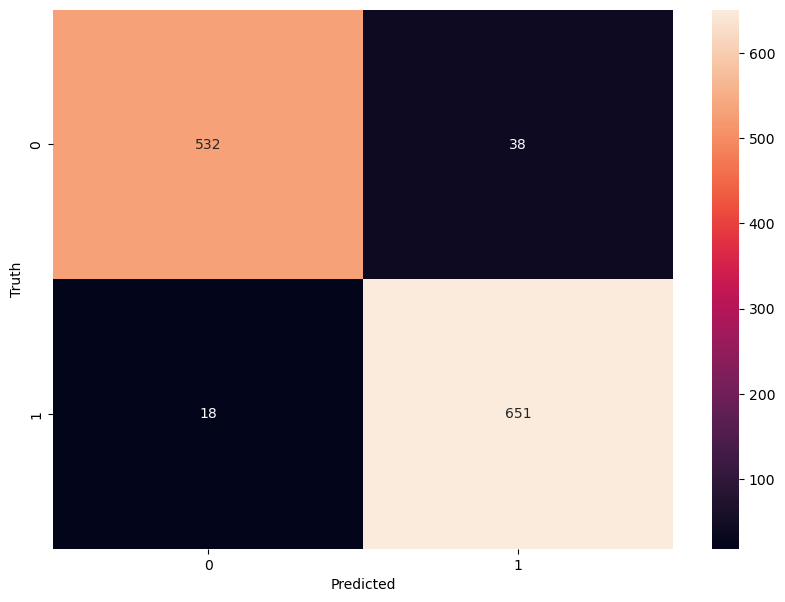

In [18]:

from sklearn.metrics import confusion_matrix , classification_report
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(yd_test, yd_pred_rfhp))
import tensorflow as tf
import seaborn as sn
cm = tf.math.confusion_matrix(labels=yd_test,predictions=yd_pred_rfhp)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

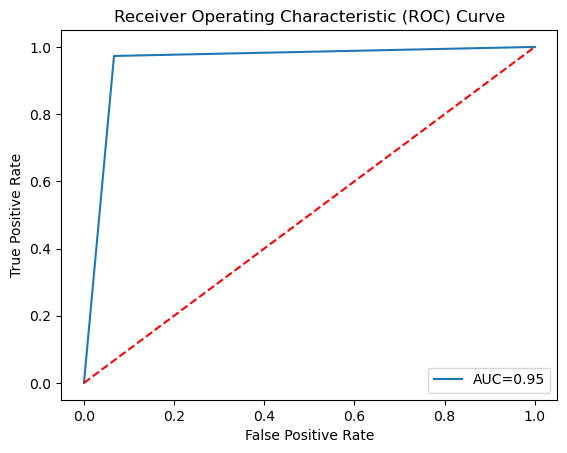

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# true binary labels and predicted probabilities from a classifier


# calculate fpr, tpr, and thresholds for different probability cutoffs
fpd, tpd, thresholds = roc_curve(yd_test, yd_pred_rfhp)

# calculate AUC score
auc_score = roc_auc_score(yd_test, yd_pred_rfhp)

# plot the ROC curve
plt.plot(fpd, tpd, label=f'AUC={auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix , classification_report
# compute the confusion matrix
tnd, fpd, fnd, tpd = confusion_matrix(yd_test, yd_pred_rfhp).ravel()

# compute the observed proportion of agreement
pod = (tpd + tnd) / (tpd + tnd + fpd + fnd)

# compute the expected proportion of agreement
ped = ((tpd + fpd) * (tpd + fnd) + (tnd + fpd) * (tnd + fnd)) / (tpd + tnd + fpd + fnd) ** 2

# compute Cohen's kappa
kappa_d = (pod - ped) / (1 - ped)

print(f"Cohen's kappa: {kappa_d}")

Cohen's kappa: 0.908786874901404


# Hyperparametric tuning balancing using up sampling

In [21]:
#Up-sampling
from  imblearn.combine import SMOTETomek
st=SMOTETomek()

x_r,y_r =st.fit_resample(x,y)
# train test split over Tomek
from sklearn.model_selection import train_test_split
xr_train, xr_test, yr_train, yr_test = train_test_split(x_r,y_r,test_size=0.2,random_state=(5))

rf = RandomForestClassifier()
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=10)] #no. of trees 
max_features=["auto","sqrt"] #no. of features considered in every split
max_depth=[int(x) for x in np.linspace(start=50,stop=100,num=20)] #no. of leaves in the trees
min_samples_split=[2,5,10,20,50] #min no. of samples required to split a node
min_samples_leaf=[1,2,5,10] #min no. of samples required at each leaf node
#bootstrap=['True']
grid_para={'n_estimators':n_estimators,
         'max_features':max_features, 
         'max_depth':max_depth,
         'min_samples_split':min_samples_split,
         'min_samples_leaf':min_samples_leaf}
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(estimator=rf,param_distributions=grid_para,n_iter=100,cv=5,verbose=2,random_state=42,n_jobs=1)
#grid_search= GridSearchCV(rf, param_grid=grid_para,n_jobs=-1,cv=5,verbose=3)
random_search.fit(xr_train,yr_train)
yr_pred_rfhp=random_search.predict(xr_test)
format(random_search.score(xr_train,yr_train))
format(random_search.score(xr_test,yr_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  34.3s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  32.7s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  31.9s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  31.7s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  30.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=344; total time=  10.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=344; total time=  10.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=344; total time=  10.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=344; total time=  10.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=344; total time=  11.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=  14.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=  14.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=  15.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=  14.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=  15.1s
[CV] END max_depth=68, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=955; total time=  40.3s
[CV] END max_depth=68, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=955; total time=  35.3s
[CV] END max_depth=68, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=955; total time=  37.6s
[CV] END max_depth=68, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=955; total time=  45.2s
[CV] END max_depth=68, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=955; total time=  42.8s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=466; total time=  15.1s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=466; total time=  14.4s
[CV] END max_depth=76, max_featur

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  37.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  36.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  37.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  36.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  35.5s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=466; total time=  25.1s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=466; total time=  26.5s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=466; total time=  26.3s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=466; total time=  26.5s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=466; total time=  25.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=588; total time=  39.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=588; total time=  38.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=588; total time=  36.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=588; total time=  38.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=588; total time=  36.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=73, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=  10.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=73, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=  10.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=73, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=  10.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=73, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=  10.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=73, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=  10.5s
[CV] END max_depth=57, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=711; total time=  34.6s
[CV] END max_depth=57, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=711; total time=  34.9s
[CV] END max_depth=57, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=711; total time=  34.4s
[CV] END max_depth=57, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=711; total time=  34.1s
[CV] END max_depth=57, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=711; total time=  34.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=588; total time=  26.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=588; total time=  26.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=588; total time=  26.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=588; total time=  26.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=588; total time=  26.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=955; total time=  44.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=955; total time=  44.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=955; total time=  44.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=955; total time=  43.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=955; total time=  42.6s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=222; total time=   7.1s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=222; total time=   7.4s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=222; total time=   7.1s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=222; total time=   6.4s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=222; total time=   6.9s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=344; total time=  10.9s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=344; total time=  10.7s
[CV] END max_depth=76, max_feat

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=588; total time=  27.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=588; total time=  27.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=588; total time=  23.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=588; total time=  24.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=588; total time=  23.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=222; total time=   6.3s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=222; total time=   6.5s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=222; total time=   6.4s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=222; total time=   6.6s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=222; total time=   6.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=955; total time=  30.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=955; total time=  31.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=955; total time=  30.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=955; total time=  28.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=955; total time=  28.6s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1077; total time=  39.5s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1077; total time=  39.8s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1077; total time=  48.3s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1077; total time=  49.5s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1077; total time=  44.0s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=344; total time=  15.6s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=344; total time=  16.1s
[CV] END max_depth=63, max_f

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=89, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   8.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=89, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   8.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=89, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   8.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=89, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   8.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=89, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   8.1s
[CV] END max_depth=97, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=833; total time=  27.4s
[CV] END max_depth=97, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=833; total time=  28.4s
[CV] END max_depth=97, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=833; total time=  26.9s
[CV] END max_depth=97, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=833; total time=  24.0s
[CV] END max_depth=97, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=833; total time=  23.3s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=588; total time=  18.3s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=588; total time=  18.9s
[CV] END max_depth=52, ma

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=222; total time=   8.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=222; total time=   9.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=222; total time=   9.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=222; total time=   9.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=222; total time=   9.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  53.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  50.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  46.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  57.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  59.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   9.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   7.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   7.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   6.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   6.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1077; total time=  46.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1077; total time=  48.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1077; total time=  49.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1077; total time=  43.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1077; total time=  47.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=833; total time=  35.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=833; total time=  35.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=833; total time=  33.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=833; total time=  30.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=833; total time=  33.4s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=  11.5s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=  11.4s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=  11.6s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=  11.4s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=  12.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  48.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  40.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  41.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  40.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  40.8s
[CV] END max_depth=78, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=588; total time=  17.4s
[CV] END max_depth=78, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=588; total time=  16.3s
[CV] END max_depth=78, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=588; total time=  16.0s
[CV] END max_depth=78, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=588; total time=  15.9s
[CV] END max_depth=78, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=588; total time=  18.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=955; total time=  35.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=955; total time=  35.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=955; total time=  35.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=955; total time=  31.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=955; total time=  33.4s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=955; total time=  43.5s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=955; total time=  43.5s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=955; total time=  41.8s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=955; total time=  42.1s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=955; total time=  48.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  34.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  31.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  30.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  27.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=711; total time=  30.8s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=833; total time=  31.2s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=833; total time=  30.8s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=833; total time=  30.9s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=833; total time=  27.9s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=833; total time=  27.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=  14.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=  16.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=  15.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=  15.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=84, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=466; total time=  15.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  44.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  41.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  46.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time= 1.1min


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time= 1.1min


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=344; total time=  17.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=344; total time=  16.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=344; total time=  16.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=344; total time=  17.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=344; total time=  16.4s
[CV] END max_depth=81, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  36.1s
[CV] END max_depth=81, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  36.0s
[CV] END max_depth=81, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  33.7s
[CV] END max_depth=81, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  33.8s
[CV] END max_depth=81, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=711; total time=  33.6s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=711; total time=  39.7s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=711; total time=  39.3s
[CV] END max_depth=55, max_featu

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=222; total time=  10.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=222; total time=  10.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=222; total time=  10.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=222; total time=  11.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=222; total time=  11.3s
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1077; total time= 1.1min
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1077; total time= 1.0min
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1077; total time= 1.1min
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1077; total time= 1.0min
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1077; total time= 1.0min


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=222; total time=  11.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=222; total time=  11.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=222; total time=  11.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=222; total time=  11.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=222; total time=  11.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  59.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  51.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  47.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  49.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=  48.6s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   6.5s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   6.8s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   6.5s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   6.5s
[CV] END max_depth=76, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   6.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=1200; total time=  36.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=1200; total time=  33.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=1200; total time=  34.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=1200; total time=  33.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=1200; total time=  32.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=344; total time=  11.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=344; total time=  10.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=344; total time=  10.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=344; total time=  10.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=344; total time=  11.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   7.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   7.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   7.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   7.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=100, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=222; total time=   7.5s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=  14.3s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=  14.3s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=  14.0s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=  14.3s
[CV] END max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=344; total time=  13.3s
[CV] END max_depth=92, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=588; total time=  21.3s
[CV] END max_depth=92, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=588; total time=  20.7s
[CV] END max_depth=92, max_features=sq

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=588; total time=  17.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=588; total time=  17.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=588; total time=  17.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=588; total time=  17.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=97, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=588; total time=  16.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=  29.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=  30.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=  31.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=  31.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=55, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=  31.7s
[CV] END max_depth=84, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=222; total time=   5.9s
[CV] END max_depth=84, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=222; total time=   5.8s
[CV] END max_depth=84, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=222; total time=   5.7s
[CV] END max_depth=84, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=222; total time=   5.6s
[CV] END max_depth=84, max_features=sqrt, min_samples_leaf=10, min_samples_split=50, n_estimators=222; total time=   5.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  25.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  25.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  27.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  27.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=65, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  28.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  30.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  27.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  28.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  37.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=711; total time=  34.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=  13.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=  13.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=  13.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=  13.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=  12.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   7.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   6.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   6.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   6.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=81, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=222; total time=   7.2s
[CV] END max_depth=94, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=  10.8s
[CV] END max_depth=94, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=  12.1s
[CV] END max_depth=94, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=  12.4s
[CV] END max_depth=94, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=  11.7s
[CV] END max_depth=94, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=344; total time=  11.7s
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=100; total time=   3.4s
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=100; total time=   3.4s
[CV] END max_depth=89, max_featu

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=  16.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=  15.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=  18.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=  18.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=344; total time=  16.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=466; total time=  18.8s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=466; total time=  20.5s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=466; total time=  19.3s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=466; total time=  19.3s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=466; total time=  20.5s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=833; total time=  47.3s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=833; total time=  47.8s
[CV] END max_depth=73, max_features=sqrt

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=588; total time=  21.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=588; total time=  24.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=588; total time=  28.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=588; total time=  32.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=588; total time=  28.0s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1200; total time=  48.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1200; total time=  39.9s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1200; total time=  40.7s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1200; total time=  45.2s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1200; total time=  44.8s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=222; total time=   9.7s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=222; total time=   9.7s
[CV] END max_depth=60, m

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=1200; total time=  43.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=1200; total time=  38.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=1200; total time=  35.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=1200; total time=  38.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=1200; total time=  39.1s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  43.0s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  45.9s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  54.1s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  51.0s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1200; total time=  53.2s
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1200; total time=  45.0s
[CV] END max_depth=89, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1200; total time=  42.4s
[CV] END max_depth=89, max

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=50, n_estimators=100; total time=   4.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=50, n_estimators=100; total time=   4.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=50, n_estimators=100; total time=   5.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=50, n_estimators=100; total time=   5.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=50, n_estimators=100; total time=   4.9s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=  18.6s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=  20.9s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=  21.2s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=  22.8s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=344; total time=  20.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=100; total time=   5.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=100; total time=   5.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=100; total time=   6.6s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=100; total time=   6.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=68, max_features=auto, min_samples_leaf=1, min_samples_split=50, n_estimators=100; total time=   5.9s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=344; total time=  25.9s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=344; total time=  26.2s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=344; total time=  24.2s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=344; total time=  25.5s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=344; total time=  23.2s
[CV] END max_depth=92, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=711; total time=  36.5s
[CV] END max_depth=92, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=711; total time=  39.5s
[CV] END max_depth=92, max_features=s

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=466; total time=  23.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=466; total time=  23.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=466; total time=  23.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=466; total time=  22.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=63, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=466; total time=  22.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=466; total time=  24.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=466; total time=  24.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=466; total time=  24.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=466; total time=  25.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=466; total time=  25.5s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=466; total time=  22.9s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=466; total time=  23.3s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=466; total time=  22.4s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=466; total time=  19.5s
[CV] END max_depth=73, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=466; total time=  19.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=588; total time=  24.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=588; total time=  22.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=588; total time=  25.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=588; total time=  25.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=78, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=588; total time=  25.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  39.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  35.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  42.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  48.8s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=52, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=  41.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1077; total time=  34.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1077; total time=  31.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1077; total time=  37.3s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1077; total time=  40.7s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=94, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1077; total time=  40.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=711; total time=  24.2s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=711; total time=  21.0s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=711; total time=  20.1s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=711; total time=  22.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=57, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=711; total time=  24.3s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=833; total time=  27.8s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=833; total time=  27.3s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=833; total time=  26.6s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=833; total time=  24.4s
[CV] END max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=833; total time=  24.1s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  58.3s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=  58.0s
[CV] END max_depth=55, max_featu

C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=92, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=711; total time=  23.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=92, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=711; total time=  23.5s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=92, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=711; total time=  21.4s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=92, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=711; total time=  25.9s


C:\Users\SURJAKANTA\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=92, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=711; total time=  26.3s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   3.8s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   3.8s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   3.7s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   4.0s
[CV] END max_depth=65, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   3.9s


'0.8696767573114418'

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       984
           1       0.84      0.90      0.87       965

    accuracy                           0.87      1949
   macro avg       0.87      0.87      0.87      1949
weighted avg       0.87      0.87      0.87      1949



Text(95.72222222222221, 0.5, 'Truth')

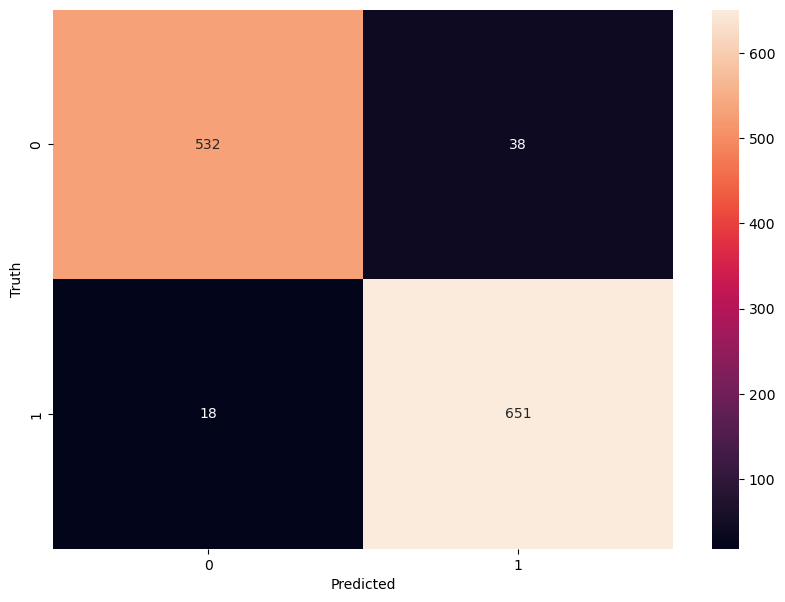

In [22]:
from sklearn.metrics import confusion_matrix , classification_report
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(yr_test, yr_pred_rfhp))
import tensorflow as tf
import seaborn as sn
cm = tf.math.confusion_matrix(labels=yd_test,predictions=yd_pred_rfhp)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

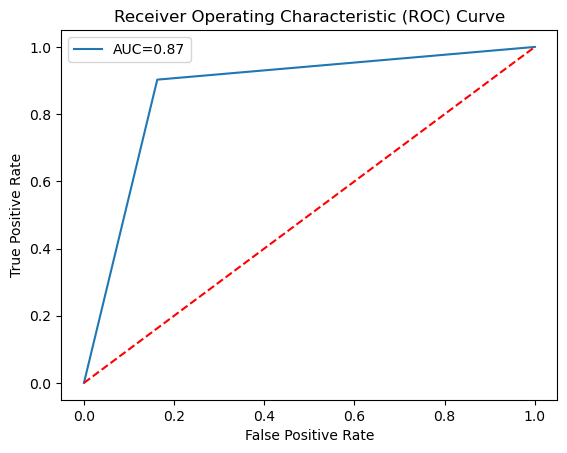

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# true binary labels and predicted probabilities from a classifier


# calculate fpr, tpr, and thresholds for different probability cutoffs
fpr, tpr, thresholds = roc_curve(yr_test, yr_pred_rfhp)

# calculate AUC score
auc_score = roc_auc_score(yr_test, yr_pred_rfhp)

# plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC={auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [24]:

from sklearn.metrics import confusion_matrix , classification_report
# compute the confusion matrix
tnr, fpr, fnr, tpr = confusion_matrix(yr_test, yr_pred_rfhp).ravel()

# compute the observed proportion of agreement
por = (tpr + tnr) / (tpr + tnr + fpr + fnr)

# compute the expected proportion of agreement
per = ((tpr + fpr) * (tpr + fnr) + (tnr + fpr) * (tnr + fnr)) / (tpr + tnr + fpr + fnr) ** 2

# compute Cohen's kappa
kappa_r = (por - per) / (1 - per)

print(f"Cohen's kappa: {kappa_r}")


Cohen's kappa: 0.7395007509048219


In [26]:
best_estimator = random_search.best_estimator_
feature_importances = best_estimator.feature_importances_
for feature, importance in zip(xd_train.columns, feature_importances):
    print(f"{feature}: {importance}")


SeniorCitizen: 0.014791022326787173
Partner: 0.02074837014900119
Dependents: 0.020257688764444087
tenure: 0.1593099553312368
PhoneService: 0.007243203574101325
MultipleLines: 0.015920116211659605
OnlineSecurity: 0.03566795156294129
OnlineBackup: 0.02133995328245518
DeviceProtection: 0.0164369864315517
TechSupport: 0.02476171451773927
StreamingTV: 0.015221287517025249
StreamingMovies: 0.015738561977490434
PaperlessBilling: 0.020987573807342393
MonthlyCharges: 0.14219474080692476
TotalCharges: 0.13513215468136974
InternetService_DSL: 0.012917028992568228
InternetService_Fiber optic: 0.04047457495144521
InternetService_No: 0.02495718482369991
Contract_Month-to-month: 0.07951792663416837
Contract_One year: 0.024898909541410157
Contract_Two year: 0.053230751196931145
PaymentMethod_Bank transfer (automatic): 0.01270161272711748
PaymentMethod_Credit card (automatic): 0.01292034441812891
PaymentMethod_Electronic check: 0.029640810520087473
PaymentMethod_Mailed check: 0.012035321244491838
gende

In [28]:
# Sort the feature importances in ascending order
sorted_indices = feature_importances.argsort()[::-1]

# Print the feature importances in ascending order
for feature_index in sorted_indices:
    feature = x_train.columns[feature_index]
    importance = feature_importances[feature_index]
    print(f"{feature}: {importance}")


tenure: 0.1593099553312368
MonthlyCharges: 0.14219474080692476
TotalCharges: 0.13513215468136974
Contract_Month-to-month: 0.07951792663416837
Contract_Two year: 0.053230751196931145
InternetService_Fiber optic: 0.04047457495144521
OnlineSecurity: 0.03566795156294129
PaymentMethod_Electronic check: 0.029640810520087473
InternetService_No: 0.02495718482369991
Contract_One year: 0.024898909541410157
TechSupport: 0.02476171451773927
OnlineBackup: 0.02133995328245518
PaperlessBilling: 0.020987573807342393
Partner: 0.02074837014900119
Dependents: 0.020257688764444087
DeviceProtection: 0.0164369864315517
MultipleLines: 0.015920116211659605
gender_Male: 0.015773320580155084
StreamingMovies: 0.015738561977490434
StreamingTV: 0.015221287517025249
gender_Female: 0.015180933427725984
SeniorCitizen: 0.014791022326787173
PaymentMethod_Credit card (automatic): 0.01292034441812891
InternetService_DSL: 0.012917028992568228
PaymentMethod_Bank transfer (automatic): 0.01270161272711748
PaymentMethod_Maile

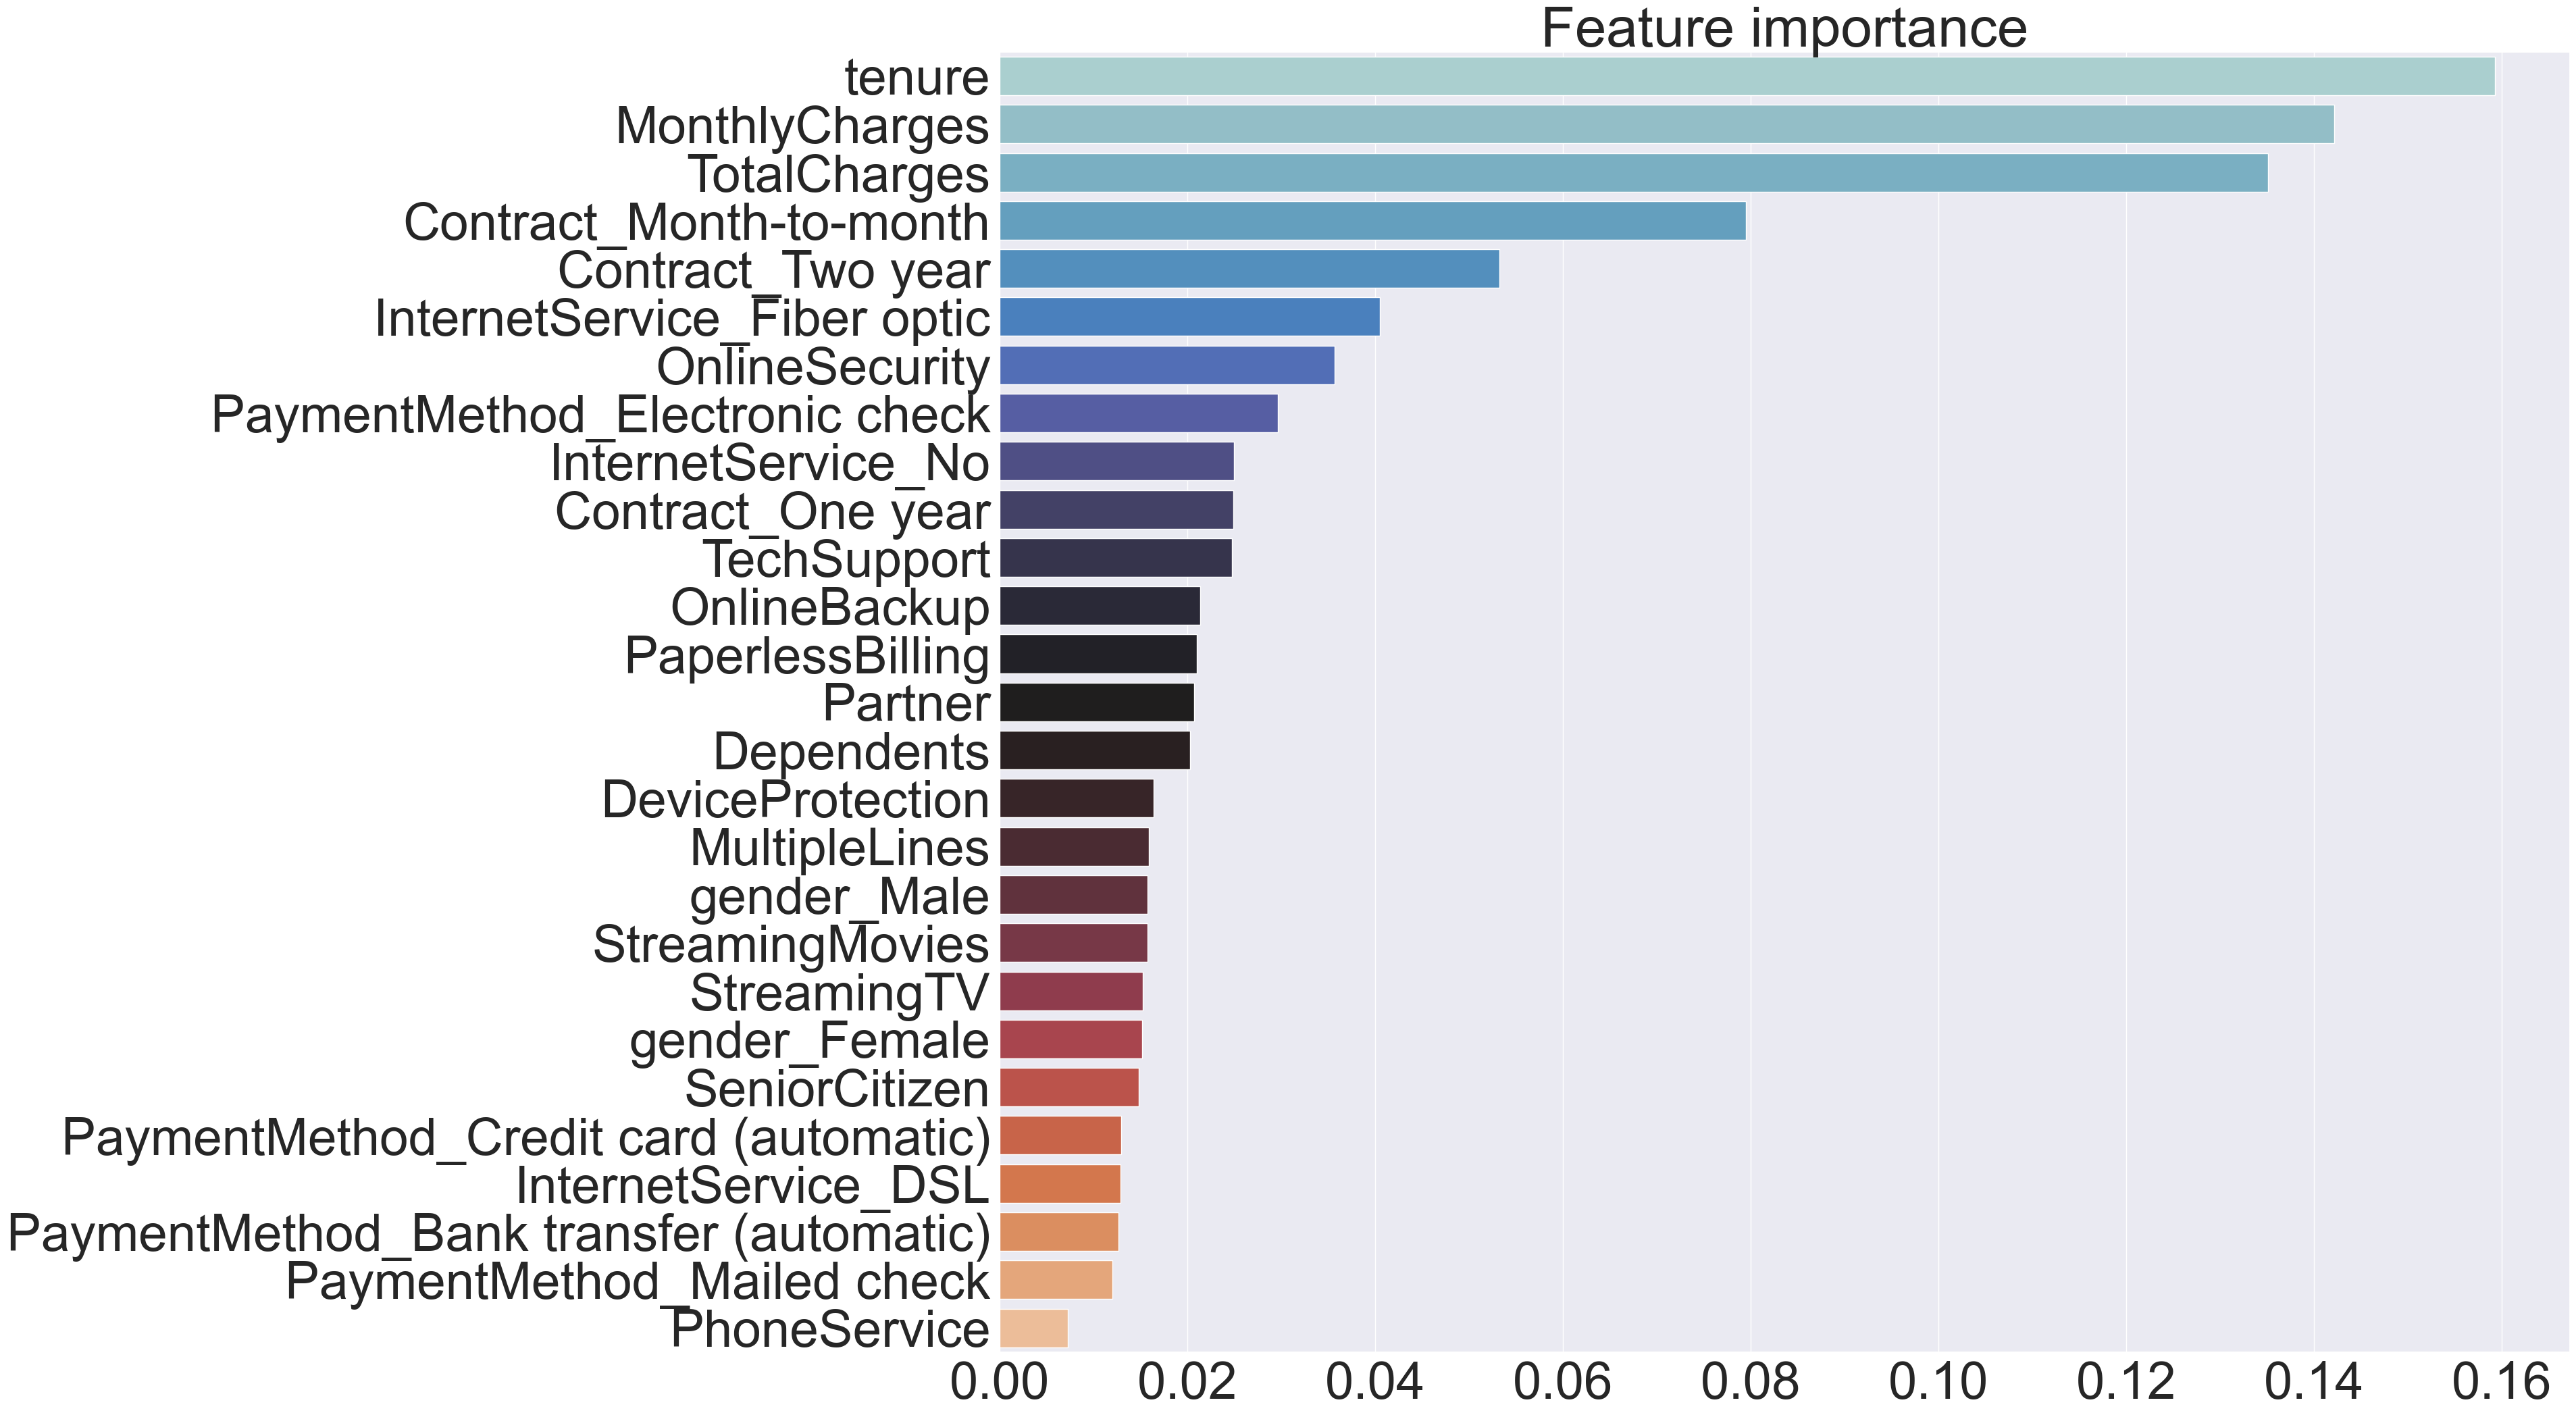

In [34]:
import seaborn as sns
# Plot features importances
imp = pd.Series(data=feature_importances, index=x_train.columns).sort_values(ascending=False)
plt.figure(figsize=(30,25))
plt.title("Feature importance")
sns.set(font_scale=5)
ax = sns.barplot(y=imp.index, x=imp.values, palette="icefire", orient='h')


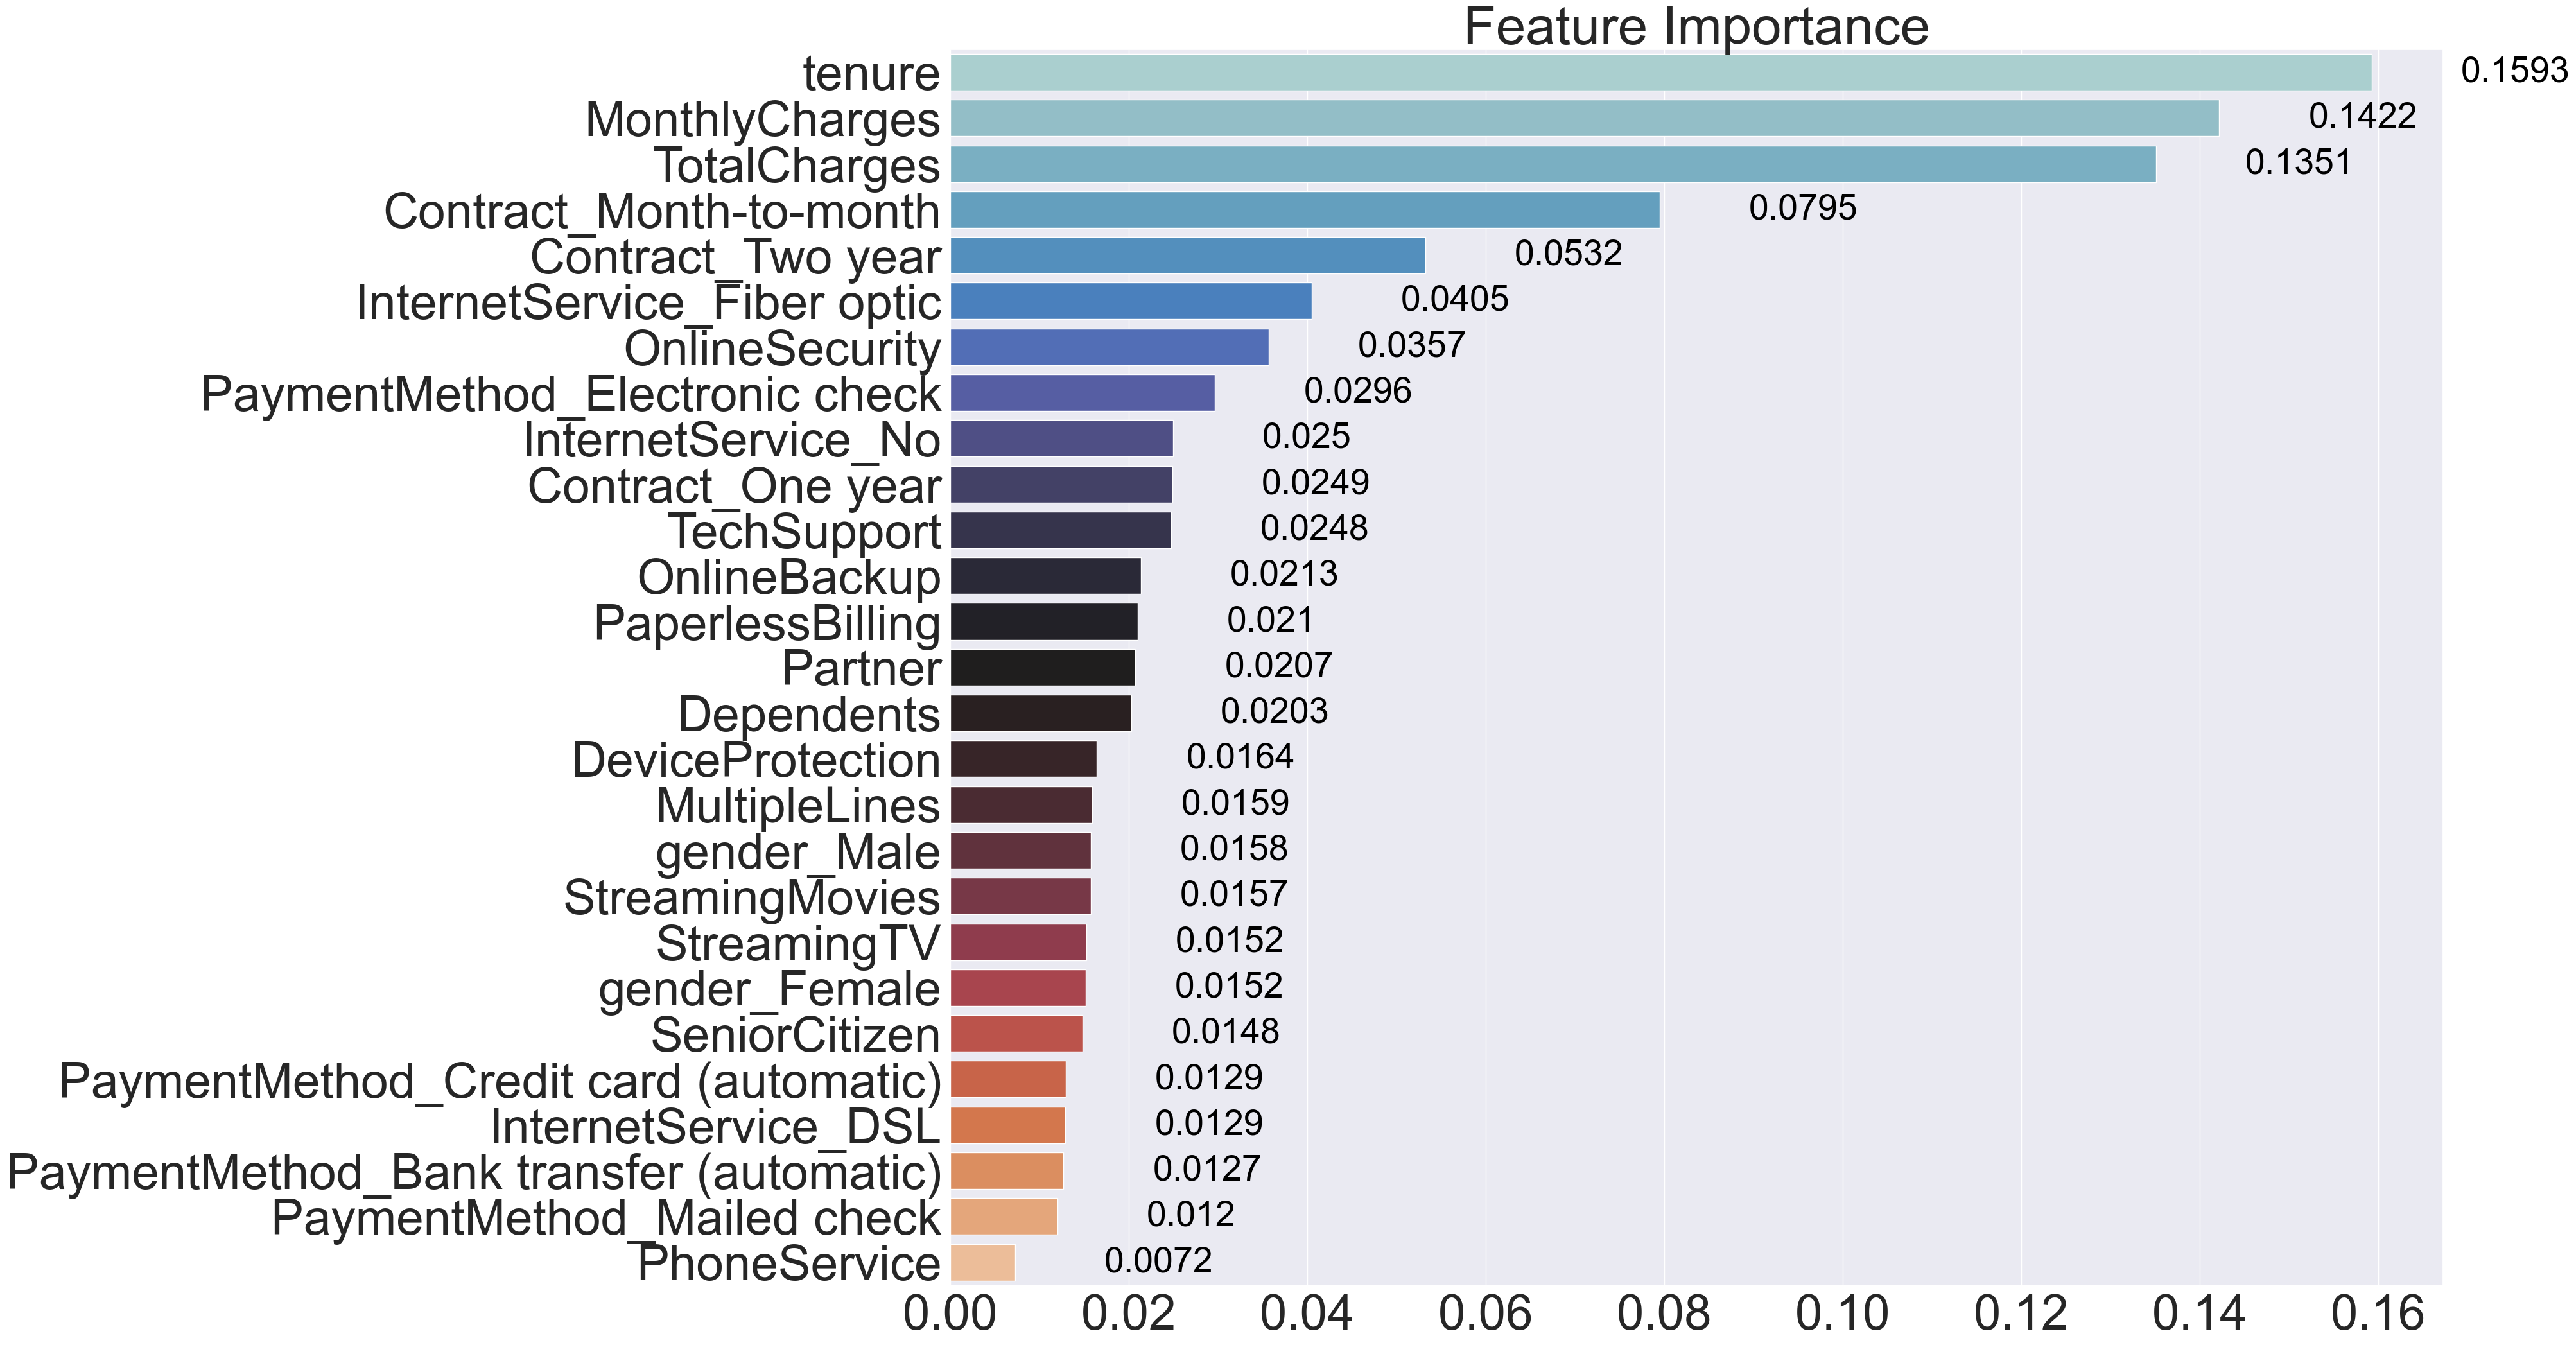

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot feature importances
imp = pd.Series(data=feature_importances, index=xd_train.columns).sort_values(ascending=False)

plt.figure(figsize=(30, 25))
plt.title("Feature Importance")
sns.set(font_scale=5)
ax = sns.barplot(y=imp.index, x=imp.values, palette="icefire", orient='h')

# Add values on top of each bar
for i, v in enumerate(imp.values):
    ax.text(v + 0.01, i, str(round(v, 4)), color='black', fontsize=40, ha='left', va='center')

plt.show()
